# Zomato Exploratory Data Analysis

###  Data Description  

#### Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.

### Problem Statement
In this session, we are going to analyze the restaurant business data. We want to study the food habbits of zomato users, their preferances, ratings etc.

##Data description:
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location

• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 👫

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people

There is another dataset which has the country codes in it


### Objective: 
#### Our goal in this notebook is to explore the data provided in Zomato csv and to analyze which restaurants have poor ratings in Zomato and why?

# Importing Libraries

In [1]:
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization

%matplotlib inline                      
import seaborn as sns                               # Importing seaborn for visualization

### Loading the datasets 

The csv file has encoding ISO-8859-1.
Encoding defines what kind of characters(ASCII or non ASCII or something different) can be stored in a file.  

In [2]:
zomato_df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')    # Reading file zomato.csv

### Inspecting Data

In [8]:
zomato_df.head()                                                  # Visualizing top 5 rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
country_df = pd.read_excel('Country-Code.xlsx')                         # Reading country code excel file

In [4]:
zomato_data = pd.merge(zomato_df, country_df, on = 'Country Code')      # Pandas Merge function to join two dataframes
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Data Exploration

**Info of the dataset**

In [8]:
zomato_data.info()                                          # Checking the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<Axes: >

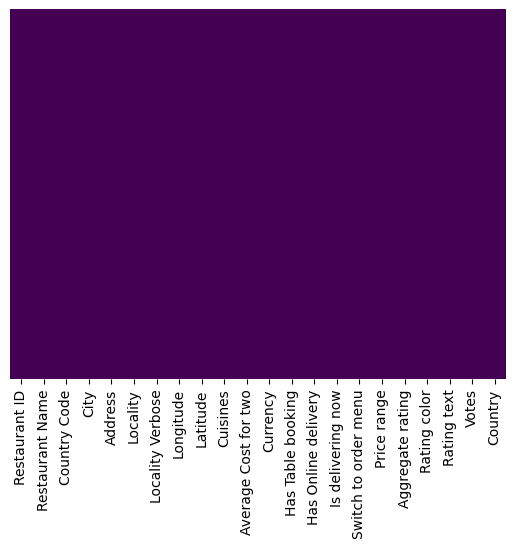

In [21]:
# Missing Value in the dataset
sns.heatmap(zomato_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Observation** 
* There are no missing values in any columns .
* Most of the rows are of datatype object i.e. they are categorical.

In [11]:
# Shape of the dataset
zomato_data.shape                                    # Number of rows and columns in a dataframe

(9551, 22)

**Description of the numeric columns of dataset**

In [19]:
zomato_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Observation**<br>
There are 9551 rows in all columns and there are no missing data in numeric columns. <br>

**Average Cost for two** <br>
The Standard Deviation is very high on 'Average Cost for two'. 
It is for different countries having different currency. <br>
There are 15 countries in this dataset and their currencies are not standardized. <br>
Look at the maximum of average price for two : 800000.

In [20]:
zomato_data[zomato_data['Average Cost for two'] == 800000]             # Extract rows which meet a specific condition

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,No,No,No,No,3,4.1,Green,Very Good,1498,Indonesia
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,873,Indonesia


On comparing 800000 Indonesian Rupiah to INR it is 3800INR, which is slightly high end.

# Exploratory Data Analysis

**Correlation plot of numeric columns**

In [22]:
correlation = zomato_data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()
correlation

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


<Axes: >

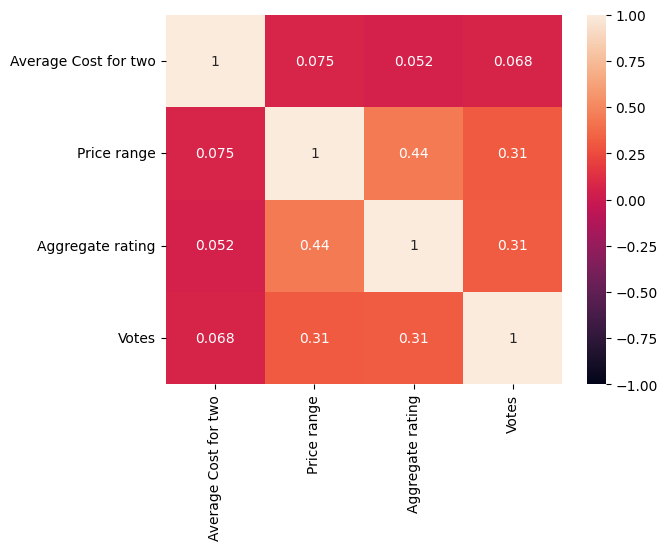

In [23]:
sns.heatmap(correlation, vmin = -1, vmax = 1,annot=True)                # Creating heatmap of the correlation matrix

**Observation** <br>

There is some correlation between *Price range* and *Aggregate rating* <br> 
The rest of the columns have no correlation. <br>

If the Price range is higher, people should rate the restaurant higher.

# Aggregate rating Analysis

In [58]:
ratings=zomato_data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor

# Aggregate ratings Vs Rating Count

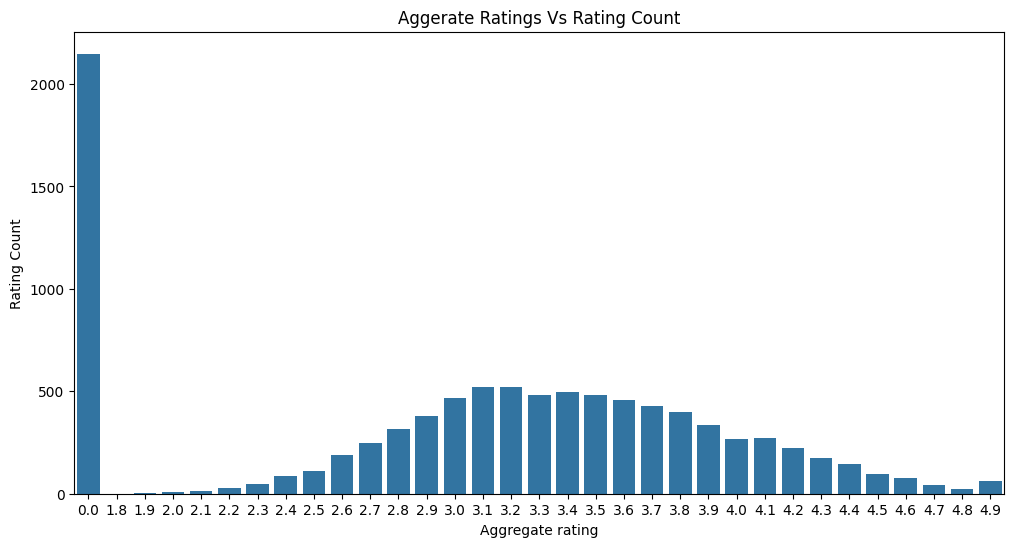

In [61]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)
plt.title("Aggerate Ratings Vs Rating Count")
plt.show()

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

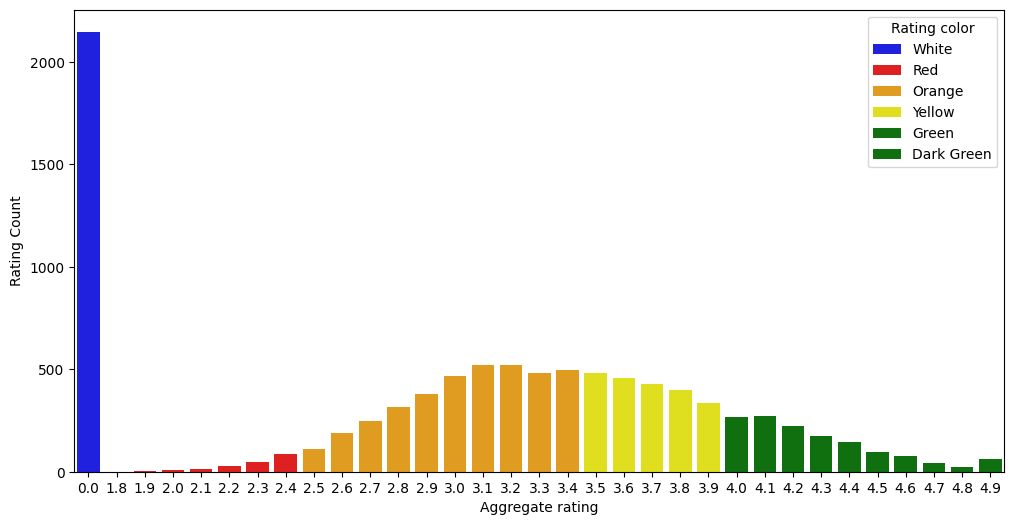

In [60]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

Observation:
1. Not Rated count is very high
2. Maximum number of rating are between 2.5 to 3.4

In [49]:
### Find the countries name that has given 0 rating 
zomato_data[zomato_data['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [50]:
zomato_data.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observations 
Maximum number of 0 ratings are from Indian customers

In [51]:
##find out which currency is used by which country?
zomato_data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### Which Countries do have online deliveries option


In [52]:
zomato_data[zomato_data['Has Online delivery'] =="Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [53]:
zomato_data[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observations: 
1. Online Deliveries are available in India and UAE    

# Top 3 countries that uses zomato

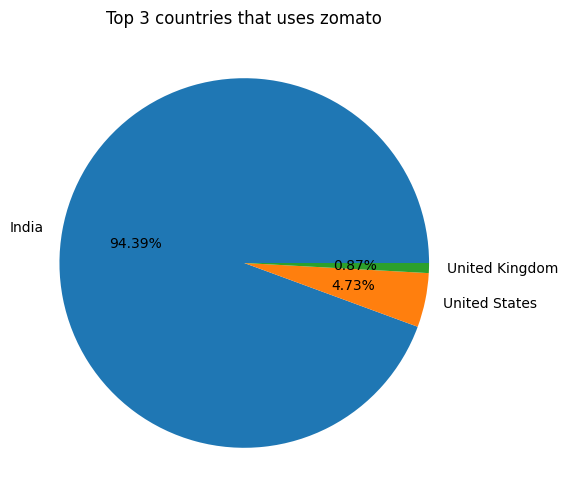

In [64]:
## Pie Chart- Top 3 countries that uses zomato
country_names=zomato_data.Country.value_counts().index
country_val=zomato_data.Country.value_counts().values
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')
plt.title("Top 3 countries that uses zomato")
plt.show()

Observation:
* Zomato maximum records or transaction are from India 
* After that USA and then United Kingdoms

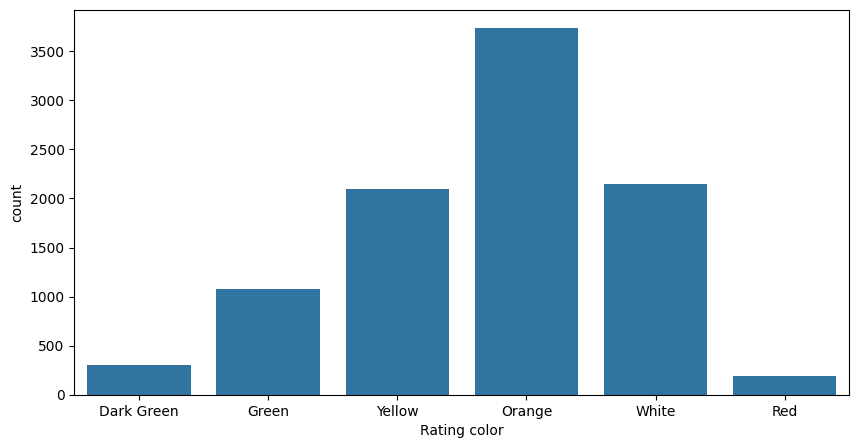

In [57]:
## Count plot
plt.figure(figsize=(10,5))
sns.countplot(x="Rating color",data=zomato_data)
plt.show()

## Top 5 cities distribution

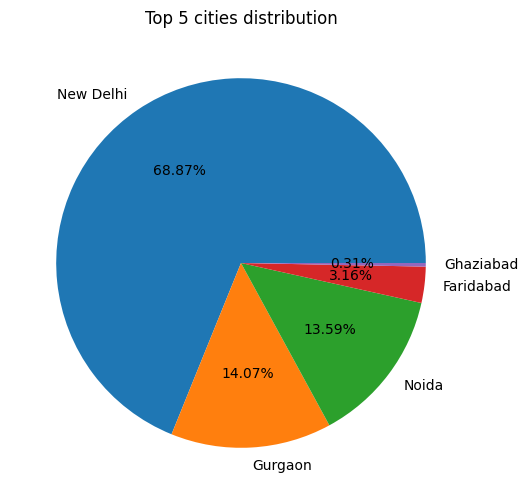

In [65]:
city_values=zomato_data.City.value_counts().values
city_labels=zomato_data.City.value_counts().index
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.title("Top 5 cities distribution")
plt.show()

Aggregate Ratings and Votes

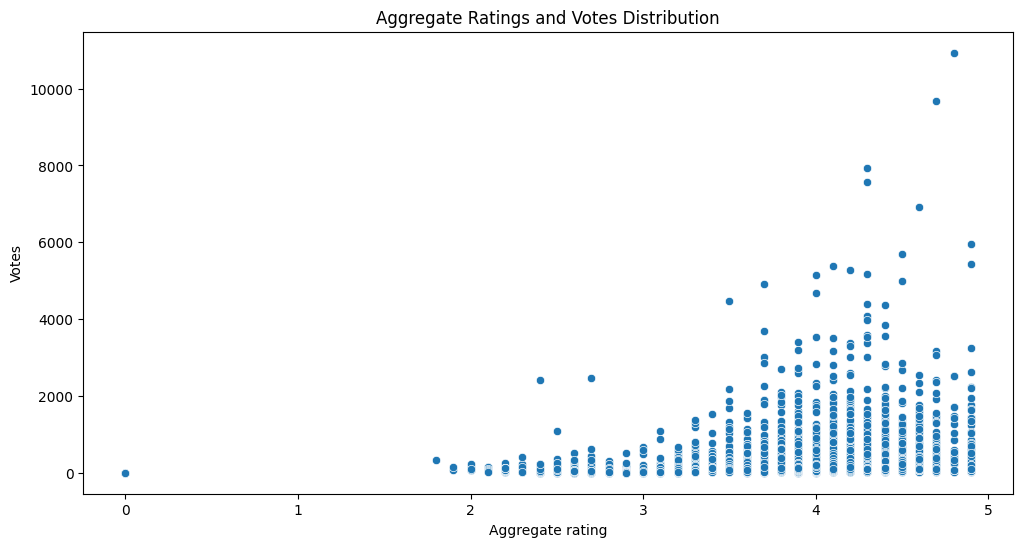

In [66]:
# Relationship between Aggregate Ratings and Votes
plt.title("Aggregate Ratings and Votes Distribution")
sns.scatterplot(x=zomato_data['Aggregate rating'], y= zomato_data['Votes'])
plt.show()

**Observation**: As the quality of food gets better, the aggregate ratings increases and the number of voters also increase.

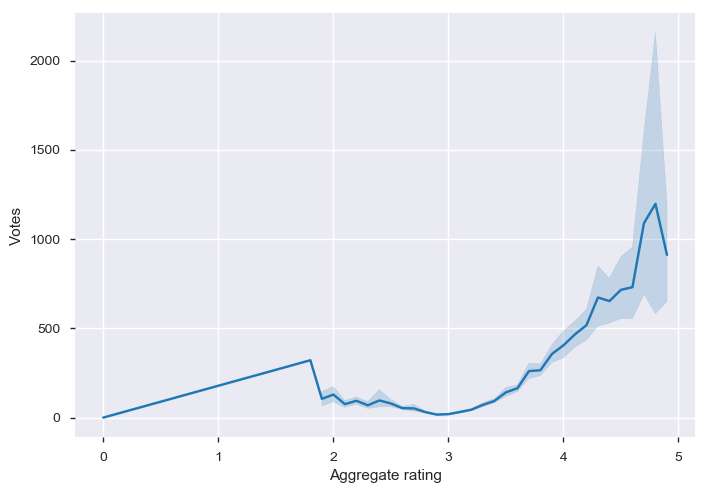

In [ ]:
# Relationship between Aggregate Ratings and Votes

sns.lineplot(x=zomato_data['Aggregate rating'], y= zomato_data['Votes'])

**Obeservation** : Here we can see the same inference. Aggregate Ratings and Votes have an increasing trend.

# Price range and Aggregate Ratings

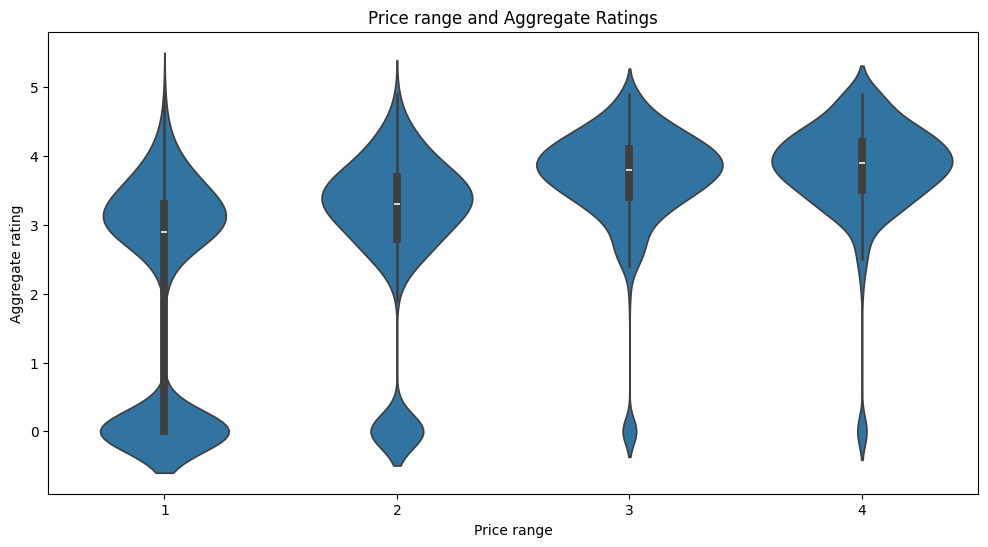

In [67]:
# Relationship between Price range and Aggregate Ratings

sns.violinplot(x='Price range', y='Aggregate rating', data = zomato_data)
plt.title("Price range and Aggregate Ratings")
plt.show()

Observation :
* Here we can clearly see that with increase in Price range, the median of ratings also increase.